# Plotting Heatmaps
This tutorial shows how to convert grid data into heatmap. 

The intput data file contains measured quantities at various points on a grid (100x100) where each line is structured as follows:

```
(x position, y position, potential energy)
```

Note that the data file is regularly structured in that for each x, it then scans in the y direction(i.e., the first 100 data points all correspond to the same x), allowing us to  easily transform the data into a matrix.

In [4]:
import matplotlib as plt
import matplotlib.pyplot as pyplt
import numpy as np
import matplotlib.cm as cm

#load in the file
x, y, pe= np.loadtxt(fname='emap2.txt', skiprows=0).T

#define our color scheme
mycmap = cm.get_cmap('viridis')

#find the min and max
pe_min, pe_max = pe.min(), pe.max()
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()

print(pe_min, pe_max)
print(x_min, x_max)
print(y_min, y_max)

-3.44756 4.49415
-41.4087 40.5805
-43.002 42.1419


To put the data in a form for plotting, we need to reshape our the data we want to plot, from a long list of 100000 points, to a square that is 100x100.



[[ 2.5101   2.78567  2.78803 ...,  1.74056  2.0262   2.36508]
 [ 2.27602  2.54313  2.55304 ...,  1.59405  1.84474  2.1531 ]
 [ 2.07379  2.3168   2.31855 ...,  1.50827  1.71955  1.9872 ]
 ..., 
 [ 2.53783  2.7729   2.69835 ...,  1.74225  2.05805  2.40539]
 [ 2.57571  2.83213  2.78685 ...,  1.7353   2.06329  2.42591]
 [ 2.50937  2.7802   2.7621  ...,  1.68375  1.99766  2.35559]]


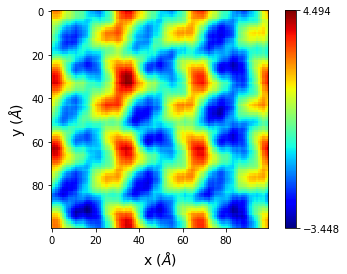

In [5]:
#reshape
pe_reshaped = np.reshape(pe, (-1,100))
print(pe_reshaped)

#plot
pyplt.imshow(pe_reshaped, cmap=cm.viridis)
cb = pyplt.colorbar(ticks=[pe_min,pe_max])

pyplt.xlabel('x ($\AA$)', fontsize=14)
pyplt.ylabel('y ($\AA$)', fontsize=14)

#plt.savefig('map.pdf')
pyplt.show()

This looks nice, however, the x and y axis only correspond to a grid point id, (i.e., 0 to 100), not the actual x or y positions in space.  We can simply create our own custom tick mark labels.

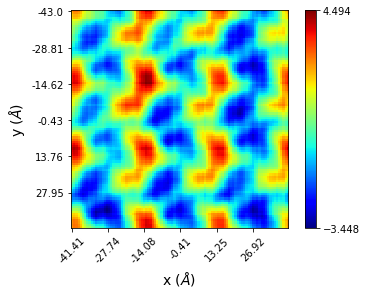

In [6]:
#create a list of tick values
xticks = []
yticks = []
ticks = []
number_of_ticks = 6
for i in range(number_of_ticks):
    x = x_min +i*(x_max-x_min)/number_of_ticks
    y = y_min +i*(y_max-y_min)/number_of_ticks
    xticks.append(round(x, 2))    #round these to 2 decimal places for space concerns
    yticks.append(round(y, 2))
    ticks.append(i*100.0/number_of_ticks)

#plot
pyplt.imshow(pe_reshaped, cmap=cm.viridis)
cb = pyplt.colorbar(ticks=[pe_min,pe_max])

pyplt.xticks(ticks, xticks, rotation=45)
pyplt.yticks(ticks, yticks)

pyplt.xlabel('x ($\AA$)', fontsize=14)
pyplt.ylabel('y ($\AA$)', fontsize=14)

#plt.savefig('map.pdf')
pyplt.show()